In [115]:
import yfinance as yf

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [116]:
df_apple_to_csv = yf.download("AAPL", start="2020-01-01", end="2025-08-13")
df_microsoft_to_csv = yf.download("MSFT", start="2020-01-01", end="2025-08-13")
df_amazon_to_csv = yf.download("AMZN", start="2020-01-01", end="2025-08-13")
df_nvidia_to_csv = yf.download("NVDA", start="2020-01-01", end="2025-08-13")


apple_path = 'datasets/apple.csv'
microsoft_path = 'datasets/microsoft.csv'
amazon_path = 'datasets/amazon.csv'
nvidia_path = 'datasets/nvidia.csv'

df_apple_to_csv.to_csv(apple_path)
df_microsoft_to_csv.to_csv(microsoft_path)
df_amazon_to_csv.to_csv(amazon_path)
df_nvidia_to_csv.to_csv(nvidia_path)

df_apple = pd.read_csv(apple_path)
df_microsoft = pd.read_csv(microsoft_path)
df_amazon = pd.read_csv(amazon_path)
df_nvidia = pd.read_csv(nvidia_path)

C:\Users\acer\AppData\Local\Temp\ipykernel_22824\126190450.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_apple_to_csv = yf.download("AAPL", start="2020-01-01", end="2025-08-13")
[*********************100%***********************]  1 of 1 completed
C:\Users\acer\AppData\Local\Temp\ipykernel_22824\126190450.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_microsoft_to_csv = yf.download("MSFT", start="2020-01-01", end="2025-08-13")
[*********************100%***********************]  1 of 1 completed
C:\Users\acer\AppData\Local\Temp\ipykernel_22824\126190450.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_amazon_to_csv = yf.download("AMZN", start="2020-01-01", end="2025-08-13")
[*********************100%***********************]  1 of 1 completed
C:\Users\acer\AppData\Local\Temp\ipykernel_22824\126190450.py:4: FutureWarning: YF.download() has changed argument auto_adjus

In [117]:
df_apple['Date'] = df_apple['Price']
df_apple = df_apple.drop(index=[0,1], columns='Price')

df_microsoft['Date'] = df_microsoft['Price']
df_microsoft = df_microsoft.drop(index=[0,1], columns='Price')

df_amazon['Date'] = df_amazon['Price']
df_amazon = df_amazon.drop(index=[0,1], columns='Price')

df_nvidia['Date'] = df_nvidia['Price']
df_nvidia = df_nvidia.drop(index=[0,1], columns='Price')

In [118]:
#INITIAL
dfs = [df_apple, df_amazon, df_microsoft, df_nvidia]
window = 14
short_period = 12
long_period = 26
signal_line_period = 9
stocks = ['AAPL', 'AMZN', 'MSFT', 'NVDA']

In [119]:
#CONVERTING TO CORRECT FEATURE TYPES
def convert_type(df):
    df['Close'] = df['Close'].astype(float)
    df['High'] = df['High'].astype(float)
    df['Low'] = df['Low'].astype(float)
    df['Open'] = df['Open'].astype(float)
    df['Volume'] = df['Volume'].astype(int)
    df['Date'] = pd.to_datetime(df['Date'])

In [120]:
#FEATURE ENGINEERING
def engineer_features(df):
    df['Price Change'] = df['Close'].diff().fillna(0)

    df['Gain'] = df.loc[df['Price Change'] > 0, 'Price Change']
    df['Loss'] = -df.loc[df['Price Change'] < 0, 'Price Change']

    df['Gain'] = df['Gain'].fillna(0)
    df['Loss'] = df['Loss'].fillna(0)

    df['Average Gain'] = df['Gain'].rolling(window=window).mean().fillna(0)
    df['Average Loss'] = df['Loss'].rolling(window=window).mean().fillna(0)

    df['RS'] = df['Average Gain'] / df['Average Loss']

    df['RSI'] = 100 - (100 / (1 + df['RS']))

    df['Short EMA'] = df['Close'].ewm(span=short_period,adjust=False).mean()
    df['Long EMA'] = df['Close'].ewm(span=long_period, adjust=False).mean()

    df['MACD'] = df['Short EMA'] - df['Long EMA']

    df['Signal Line'] = df['MACD'].ewm(span=signal_line_period, adjust=False).mean()
    
    df['MACD Histogram'] = df['MACD'] - df['Signal Line']
    
    df['Year'] = df['Date'].dt.year
    df['Week'] = df['Date'].dt.weekday
    
    df['Year-Month'] = df['Date'].dt.to_period('M').astype(str)
    #df['Week']
    
    return df

In [121]:
#DROPPING NULL AND UNIMPORTANT COLUMNS/ROWS
def drop_features_and_na(df):
    df = df.drop(columns=['Gain', 'Loss'])
    df = df.dropna()
    return df

In [122]:
#PRINTING SEABORN PLOTS
def print_dmy_plots(df, stock):
    plt.figure(figsize=(15,7))
    sns.lineplot(data=df, x='Date',y='Close', errorbar=None)
    plt.title(f'1D Interval for {stock}')
    plt.show()
    
    plt.figure(figsize=(15,7))
    sns.lineplot(data=df, x='Year-Month',y='Close', errorbar=None)
    plt.xticks(ticks=df['Year-Month'][::120])
    plt.title(f'1M Interval for {stock}')
    plt.show()
    
    plt.figure(figsize=(15,7))
    sns.lineplot(data=df, x='Year',y='Close', errorbar=None)
    plt.title(f'1Y Interval for {stock}')
    plt.show()

In [123]:
#1D INTERVAL
def print_1d_plot(df, stock):
    fig = px.line(data_frame=df, x='Date', y='Close')
    fig.update_layout(width=1920, height=1080)
    fig.write_html(f"../../frontend/public/{stock}1D.html")
    print(f'1 Day Interval trend for {stock}, downloaded!')

In [124]:

#TODO: 1W INTERVAL
def print_1w_plot(df, stock):
    fig = px.line(data_frame=df, x='Date', y='Close')
    fig.update_layout(width=1920, height=1080)
    fig.write_html(f"../../frontend/public/{stock}1W.html")
    print(f'1 Week Interval trend for {stock}, downloaded!')

In [125]:
#1M INTERVAL
def print_1m_plot(df, stock):
    fig = px.line(data_frame=df, x='Year-Month', y='Close')
    fig.update_layout(width=1920, height=1080)
    fig.write_html(f"../../frontend/public/{stock}1M.html")
    print(f'1 Month Interval trend for {stock}, downloaded!')

In [126]:
#1Y INTERVAL
def print_1y_plot(df, stock):
    fig = px.line(data_frame=df, x='Year', y='Close')
    fig.update_layout(width=1920, height=1080)
    fig.write_html(f"../../frontend/public/{stock}1Y.html")
    print(f'1 Year Interval trend for {stock}, downloaded!')

In [127]:
def print_plots(df, stock):
    print_1d_plot(df, stock)
    # print_1w_plot(df, stock)
    print_1m_plot(df, stock)
    print_1y_plot(df, stock)
    pass

---------------------------------------------------------------------------
AAPL:
        Close       High        Low       Open     Volume       Date  \
15  76.728767  77.281827  76.634574  76.941293  101832400 2020-01-22   
16  77.098289  77.177986  76.233668  76.781908  104472000 2020-01-23   
17  76.876083  78.088477  76.685286  77.344620  146537600 2020-01-24   
18  74.615524  75.296586  73.632564  74.883600  161940000 2020-01-27   
19  76.726364  76.897837  75.398041  75.497062  162234000 2020-01-28   

    Price Change  Average Gain  Average Loss        RS        RSI  Short EMA  \
15      0.272919      0.508209      0.208905  2.432728  70.868654  75.349468   
16      0.369522      0.534603      0.208905  2.559075  71.902813  75.618518   
17     -0.222206      0.534603      0.174406  3.065283  75.401468  75.811989   
18     -2.260559      0.493722      0.335874  1.469959  59.513504  75.627918   
19      2.110840      0.644496      0.311552  2.068664  67.412525  75.796910   

    

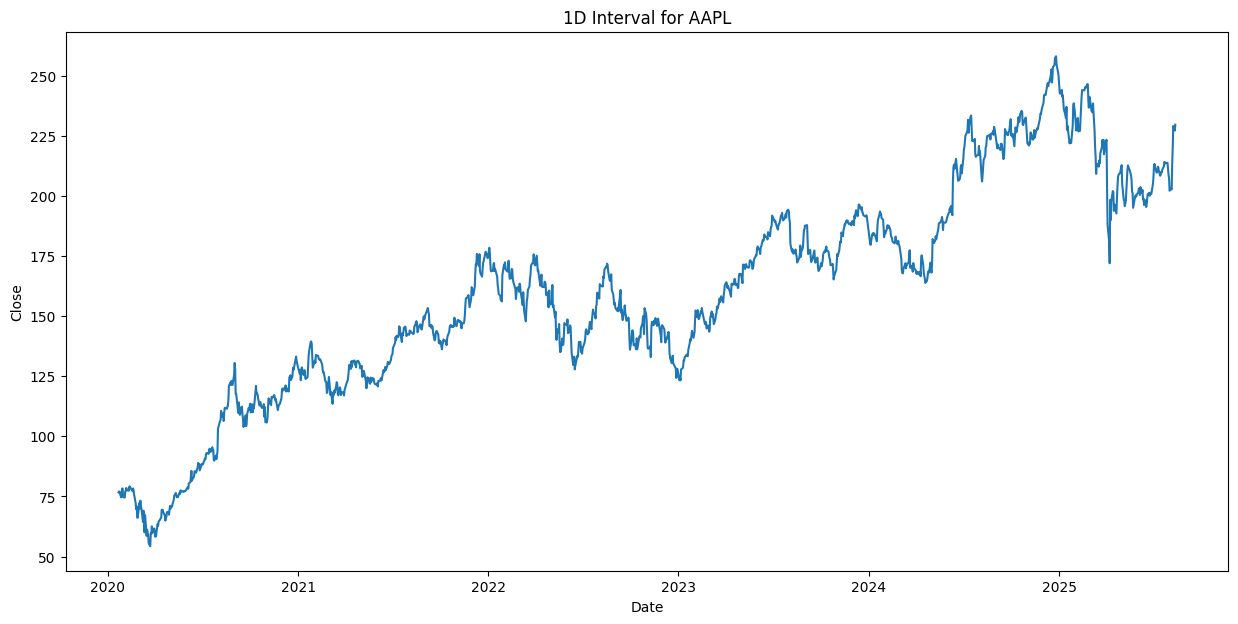

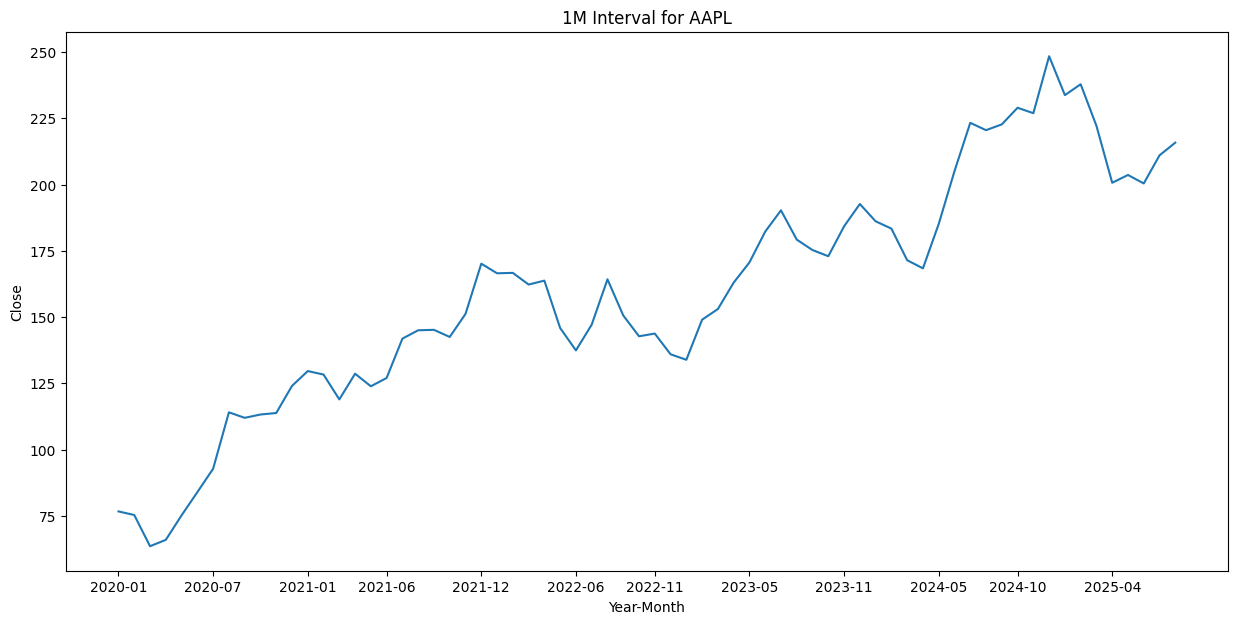

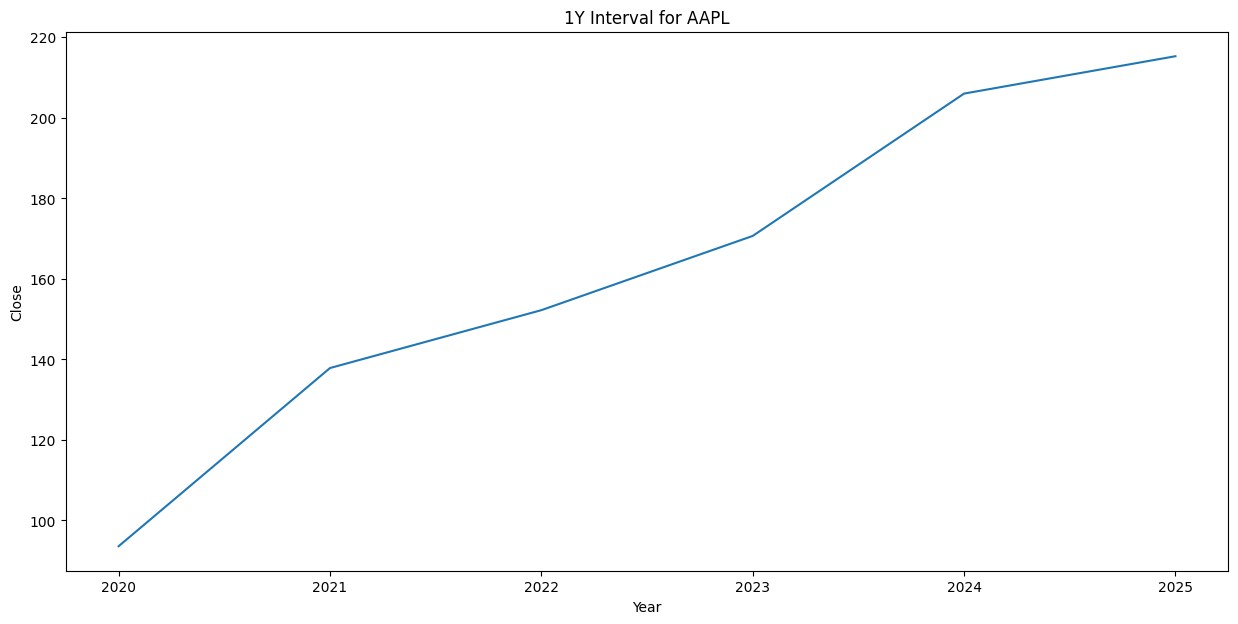

---------------------------------------------------------------------------
AMZN:
        Close       High        Low       Open    Volume       Date  \
15  94.373001  95.125000  94.167000  94.804497  64326000 2020-01-22   
16  94.228996  94.499001  93.638000  94.255501  49692000 2020-01-23   
17  93.082001  94.749496  92.372002  94.568497  75324000 2020-01-24   
18  91.417000  92.050003  90.766998  91.000000  70570000 2020-01-27   
19  92.662498  92.905502  91.500999  92.025002  56160000 2020-01-28   

    Price Change  Average Gain  Average Loss        RS        RSI  Short EMA  \
15     -0.226997      0.329679      0.367358  0.897434  47.297251  94.202401   
16     -0.144005      0.329679      0.377644  0.872990  46.609443  94.206492   
17     -1.146996      0.329679      0.377286  0.873818  46.633012  94.033494   
18     -1.665001      0.230001      0.496215  0.463510  31.671133  93.630956   
19      1.245499      0.304750      0.496215  0.614150  38.047881  93.481963   

     Long 

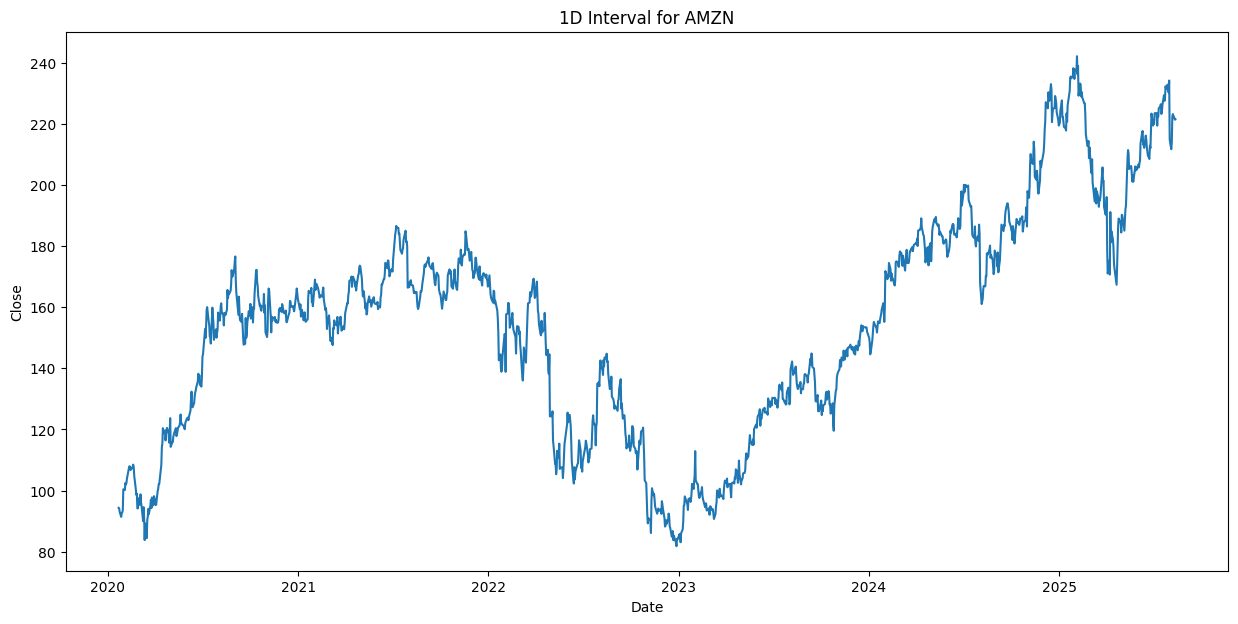

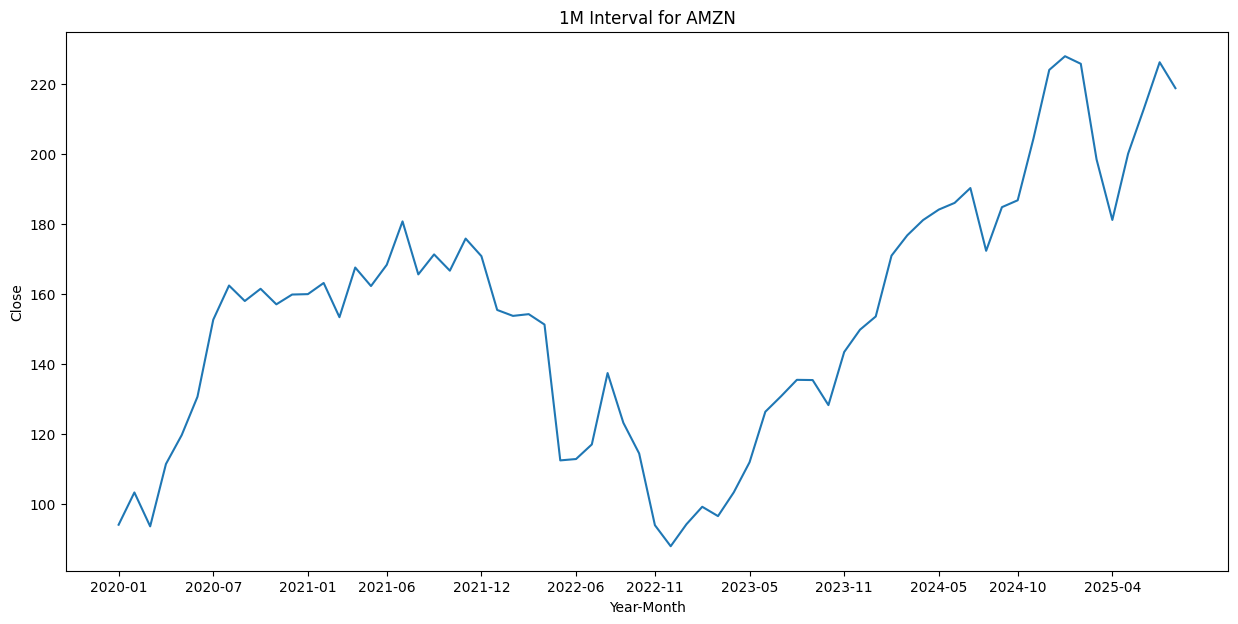

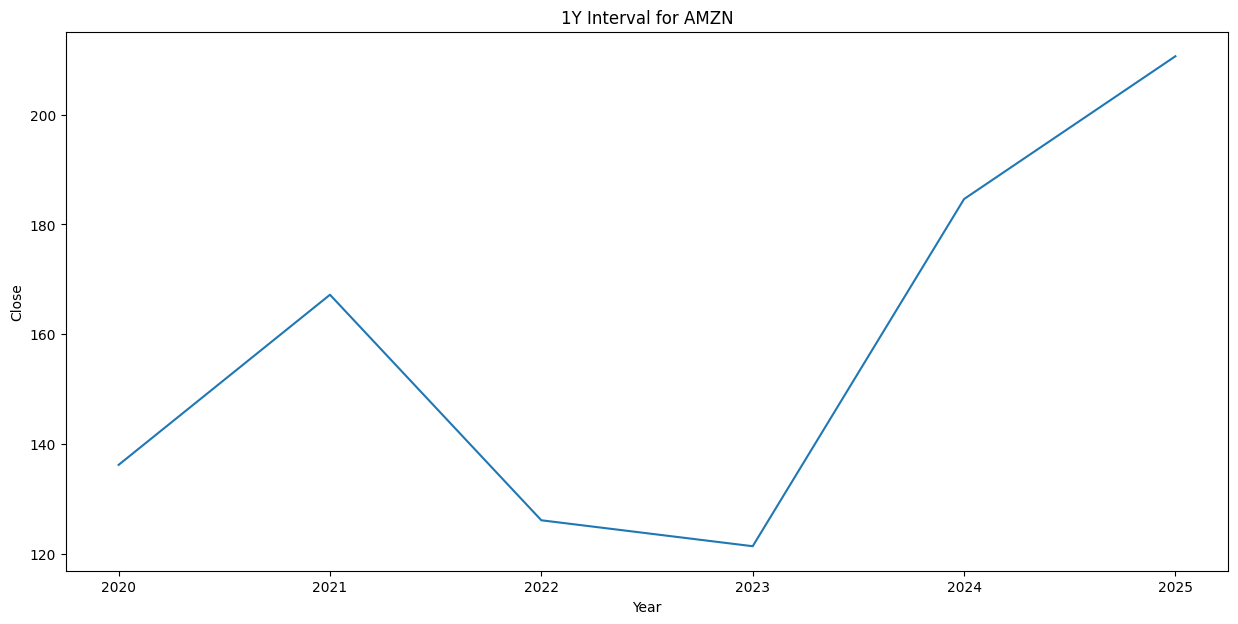

---------------------------------------------------------------------------
MSFT:
         Close        High         Low        Open    Volume       Date  \
15  157.623489  159.326250  157.604460  159.240626  24138800 2020-01-22   
16  158.593781  158.669883  157.214459  158.089615  19680800 2020-01-23   
17  156.995697  159.364336  156.434458  159.345307  24918100 2020-01-24   
18  154.370178  155.416568  152.391559  153.295252  32078100 2020-01-27   
19  157.395203  157.680569  155.121696  155.797081  24899900 2020-01-28   

    Price Change  Average Gain  Average Loss        RS        RSI   Short EMA  \
15     -0.761032      0.803818      0.458650  1.752574  63.670371  155.776366   
16      0.970291      0.873124      0.458650  1.903684  65.560991  156.209815   
17     -1.598083      0.873124      0.436903  1.998441  66.649334  156.330720   
18     -2.625519      0.845264      0.624440  1.353636  57.512538  156.029098   
19      3.025024      1.061337      0.525917  2.018069  66.866

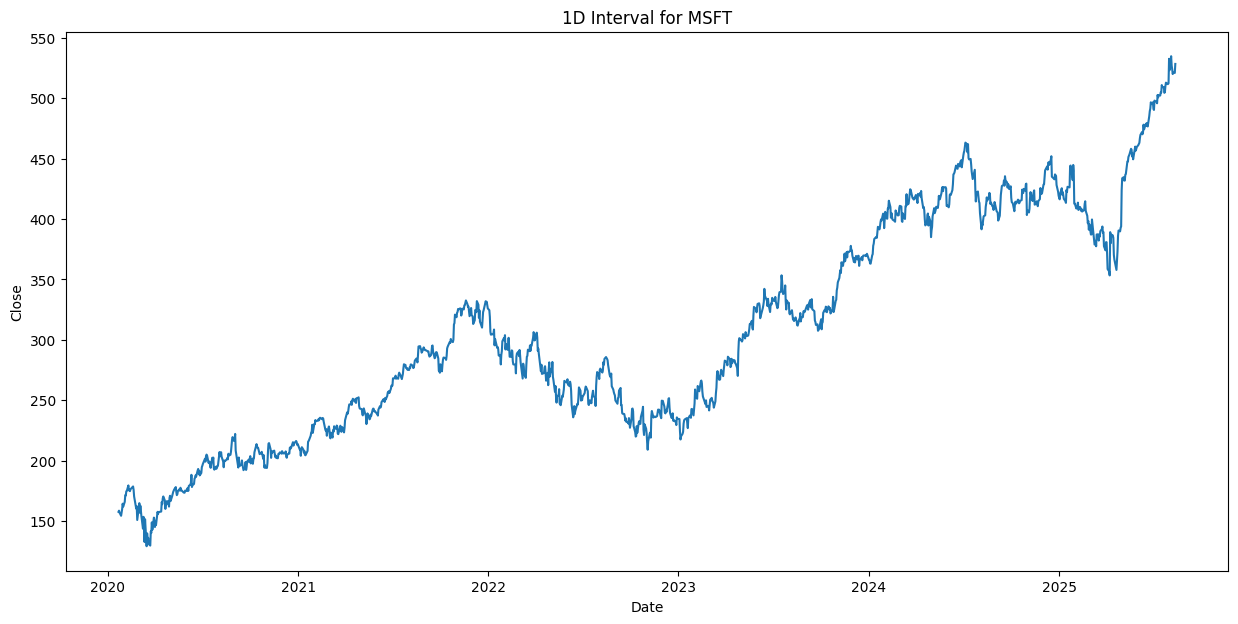

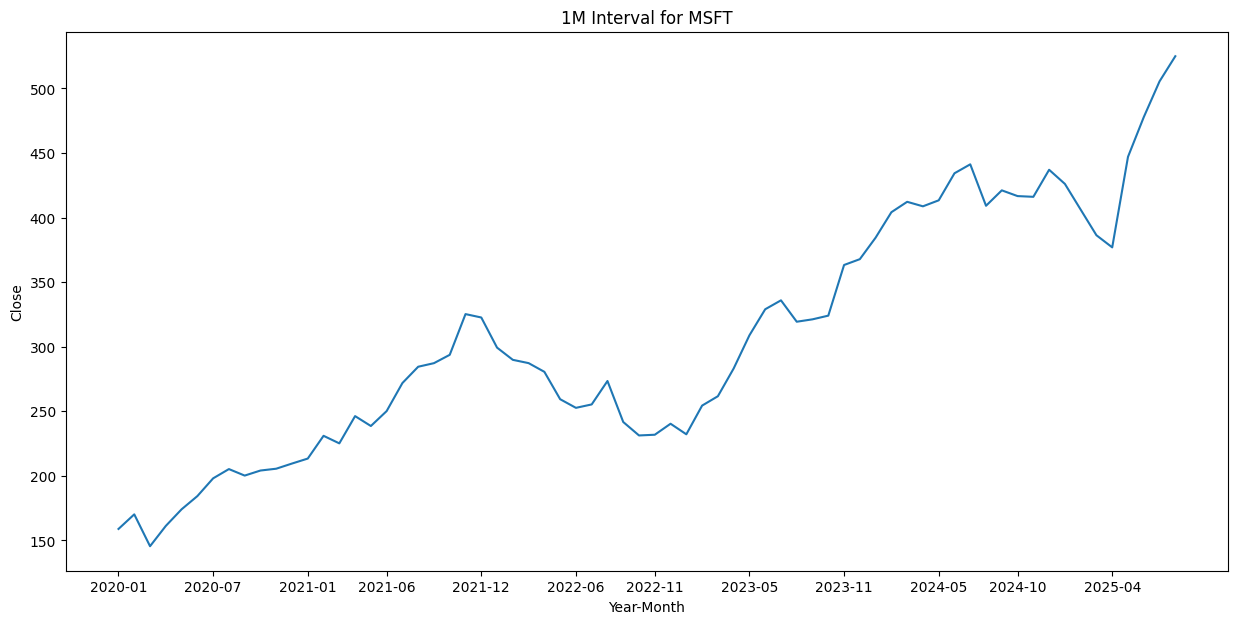

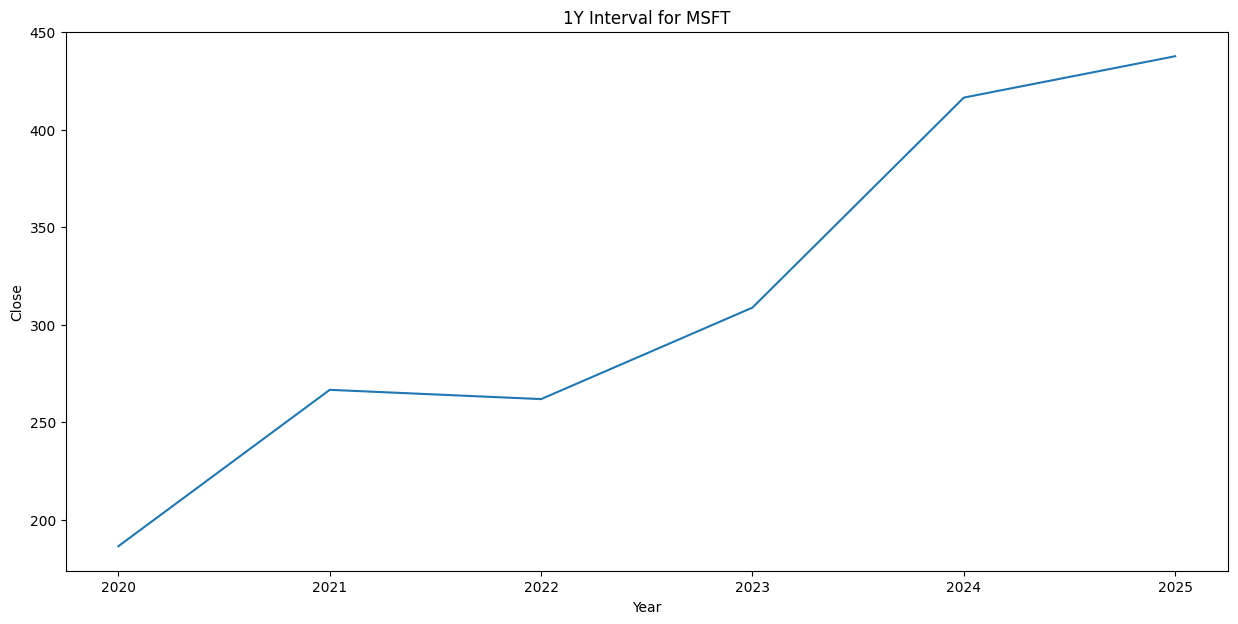

---------------------------------------------------------------------------
NVDA:
       Close      High       Low      Open     Volume       Date  \
15  6.225641  6.312264  6.198012  6.216929  239240000 2020-01-22   
16  6.294094  6.302557  6.176855  6.265718  244516000 2020-01-23   
17  6.234852  6.459374  6.180588  6.409591  373512000 2020-01-24   
18  5.978966  6.029994  5.780579  5.930178  470536000 2020-01-27   
19  6.172373  6.204732  5.991660  6.044928  310976000 2020-01-28   

    Price Change  Average Gain  Average Loss        RS        RSI  Short EMA  \
15      0.054014      0.038742      0.020607  1.880069  65.278611   6.128833   
16      0.068453      0.043631      0.020607  2.117346  67.921429   6.154258   
17     -0.059242      0.043631      0.018011  2.422506  70.781643   6.166657   
18     -0.255886      0.041871      0.036288  1.153847  53.571450   6.137781   
19      0.193408      0.050583      0.036288  1.393922  58.227546   6.143103   

    Long EMA      MACD  Sign

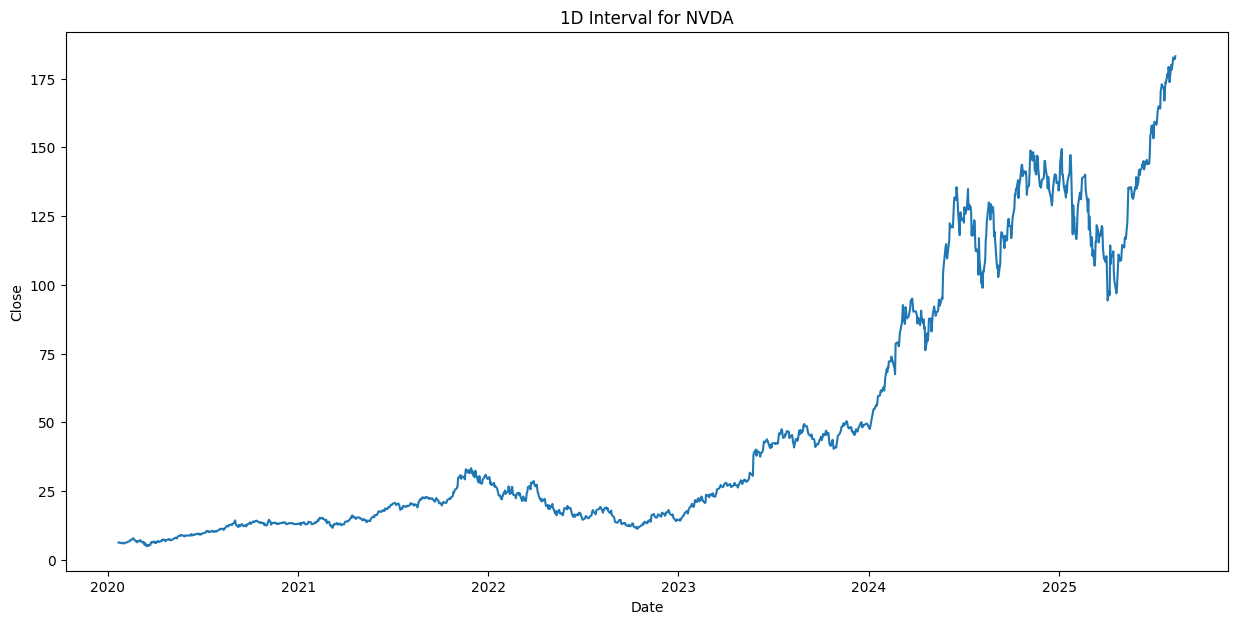

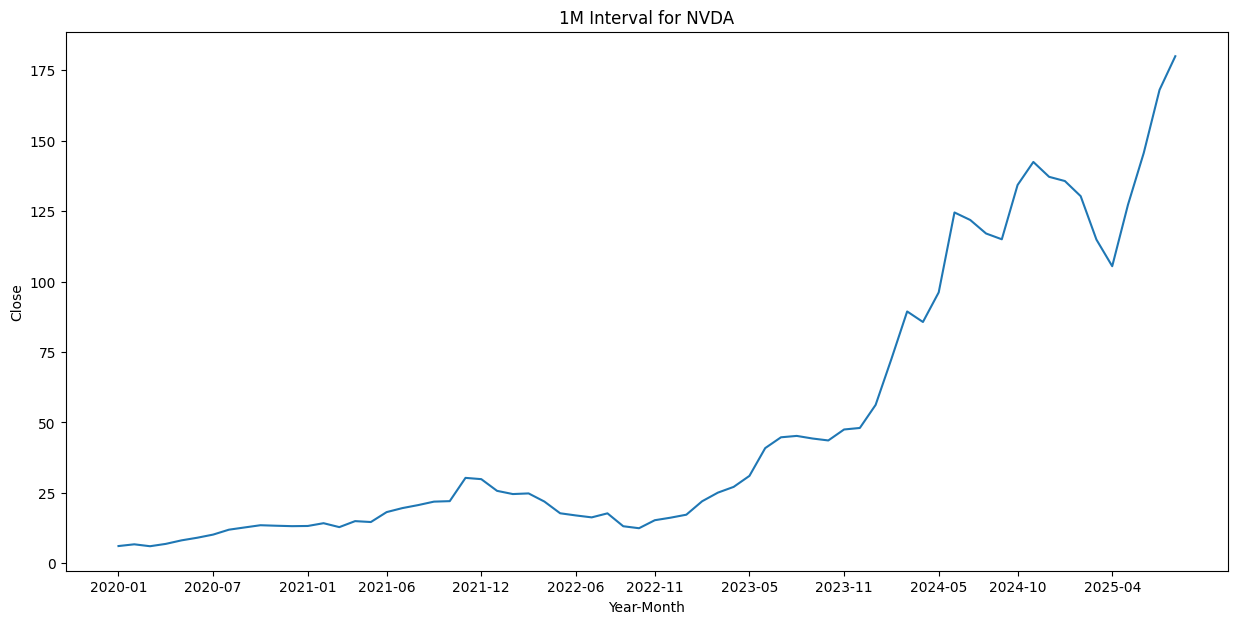

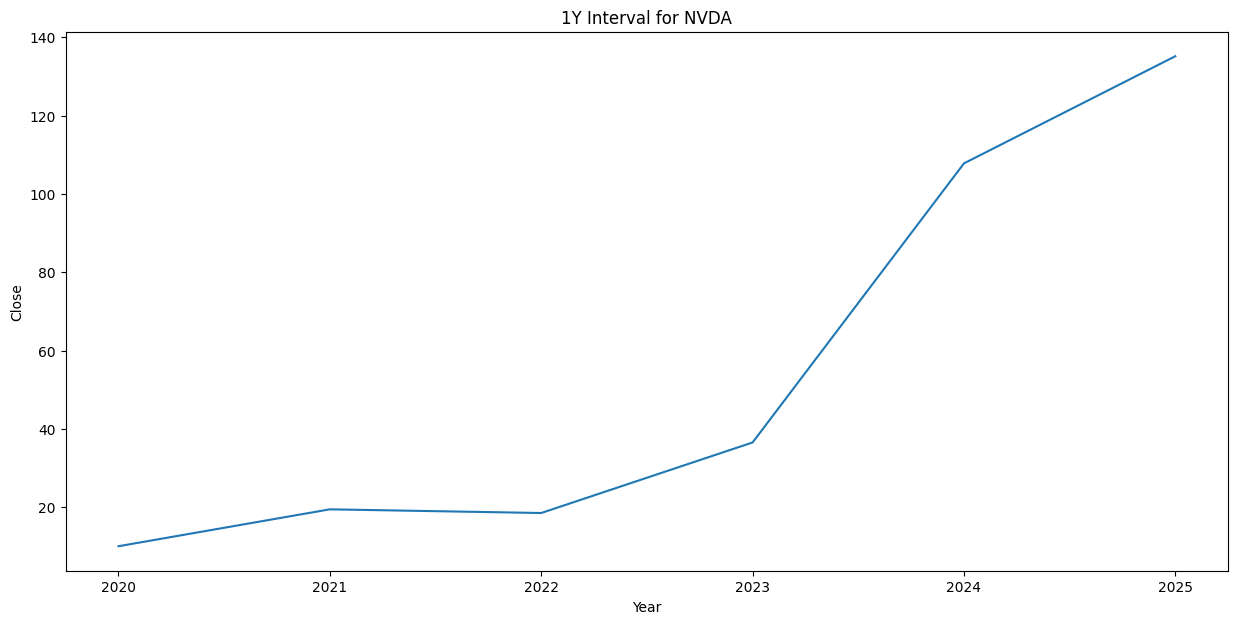

In [128]:
for i,df in enumerate(dfs):
    convert_type(df)
    df = engineer_features(df)
    df = drop_features_and_na(df)
    
    print('---------------------------------------------------------------------------')
    print(f"{stocks[i]}:")
    print(df.head())
    
    print_dmy_plots(df, stocks[i])
    # print_plots(df, stocks[i])